## What Is a Dataset?

A dataset is a collection of data points with a common schema. The Cortex Python SDK provides transformations and visualizations to facilitate data cleaning, feature identification and feature construction. In this notebook we demonstrate how to build a dataset and how to view the contents of datasets.

## How is a Dataset Built? 
First, import the Cortex library and instantiate a builder.

In [1]:
%run ./config.ipynb

7.0.0
You are already using Cortex 7.0.0


In [27]:
from cortex import Cortex

builder = Cortex.client().builder()


Builder is the top level factory object in the Cortext Python SDK. The builder returns a factory object that is customized to handle the context for the particular class it builds. A dataset requires a collection of data to be useful, so the factory object returns a dataset builder that can take data in a number of different forms.

For example, you can associate a CSV file with a dataset:

In [3]:
# to help with making this dataset distinct in class we will use an input generator here for the dataset name.  
# This variable will be stored throughout this example.
dataset_name1 = input("namespace/dataset name")
    
csv_data_set_builder = builder.dataset(dataset_name1)

csv_example_data_set = csv_data_set_builder.from_csv('./data/sample_large.csv').build()

namespace/dataset name surface/sampletest1


file version not found, pushing to remote storage: /cortex/datasets/surface/sampletest1/dc5488ec0fc8ce493e2e0fe996ada3fc.csv


Or a dataset with JSON:

In [5]:
# to help with making this dataset distinct in class we will use an input generator here for the dataset name.  
# This variable will be stored throughout this example.
dataset_name2 = input("namespace/dataset name")

json_data_set_builder = builder.dataset(dataset_name2)

json_example_data_set = json_data_set_builder.from_json('./data/sample.json').build()

namespace/dataset name surface/sampletest2json


Or from a pandas DataFrame:

In [6]:
# to help with making this dataset distinct in class we will use an input generator here for the dataset name.  
# This variable will be stored throughout this example.
dataset_name3 = input("namespace/dataset name")

# two columns of random numbers, indexed a through e
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
q = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

# make a data frame by composing the columns together and labeling them
pdf = pd.DataFrame({'c1':s,'c2':q})

pd_data_set_builder = builder.dataset(dataset_name3)

data_frame_data_set = pd_data_set_builder.from_df(pdf).build()

namespace/dataset name surface/sampletest3df


file version not found, pushing to remote storage: /cortex/datasets/surface/sampletest3df/d7a962b5d82de3fb5c3385a89c9a3890.json


In [7]:
data_frame_data_set.as_pandas()

,c1,c2
0,1.691,0.002
1,-0.466,-0.001
2,0.033,-1.755
3,0.408,1.018
4,-0.789,0.600


You can also set the title and description of your dataset (this is pulling the last dataset you created above from memory):

In [8]:
csv_example_data_set.title = 'A Title for the example <yournamehere>'
csv_example_data_set.description = 'A somewhat longer piece of text that describes the purpose of the dataset <change to be more descriptive>.'

Once constructed, you can explicitly persist a dataset, here we will use the csv_example_data_set.

In [9]:
x=csv_example_data_set.save()

In [10]:
df = x.as_pandas()
print(df)

                        a                    b  c                    d      e
0     0.34406868799999996              0.85583  1   0.7914100000000001   8396
1             0.630236528  0.14639000000000002  1   0.9340799999999999  96241
2     0.19748805600000002              0.02595  1  0.41286999999999996  15238
3             0.826013125              0.98019  0              0.09473  50729
4             0.835423745              0.10236  1              0.10951  21652
5             0.362533461              0.83726  1               0.8227   1144
6     0.27993085100000004               0.8076  1                       89892
7             0.986114809               0.9273  0   0.5193300000000001  87724
8              0.23866088              0.65493  0  0.20392000000000002  65298
9             0.622499633              0.41307  1   0.6381100000000001  86973
10    0.19241784899999997          0.079691302  1                       99675
11            0.795128444   0.6262293729999999  1          0.469

Note that with the `Cortex.local()` client, the dataset is persisted to the local disk. When using the Cortex client `Cortex.client()`, the dataset is persisted in Cortex.

## Dataset Feature Construction

Datasets help in feature construction through the use of pipelines. Pipelines allow functions to be chained together to modify and combine columns to create and clarify new features in the dataset. To find out how to create and persist pipelines, see [Pipeline](https://docs.cortex.insights.ai/docs/cortex-python-sdk-guide/pipeline/).

## View Datasets

Datasets can be viewed in tables or through visualizations. 

### Data Dictionary
A Dataset can generate a data dictionary:

In [11]:
csv_example_data_set.get_dataframe()

{'columns': ['a', 'b', 'c', 'd', 'e'],
 'values': [['0.34406868799999996',
   '0.85583',
   '1',
   '0.7914100000000001',
   '8396'],
  ['0.630236528', '0.14639000000000002', '1', '0.9340799999999999', '96241'],
  ['0.19748805600000002', '0.02595', '1', '0.41286999999999996', '15238'],
  ['0.826013125', '0.98019', '0', '0.09473', '50729'],
  ['0.835423745', '0.10236', '1', '0.10951', '21652'],
  ['0.362533461', '0.83726', '1', '0.8227', '1144'],
  ['0.27993085100000004', '0.8076', '1', '', '89892'],
  ['0.986114809', '0.9273', '0', '0.5193300000000001', '87724'],
  ['0.23866088', '0.65493', '0', '0.20392000000000002', '65298'],
  ['0.622499633', '0.41307', '1', '0.6381100000000001', '86973'],
  ['0.19241784899999997', '0.079691302', '1', '', '99675'],
  ['0.795128444', '0.6262293729999999', '1', '0.469692483', '30156'],
  ['0.370717354', '0.638954335', '0', '0.9465330759999999', '8595'],
  ['0.009424809000000001', '0.6969610540000001', '1', '0.160189015', '60003'],
  ['0.87364443', '0.

### pandas DataFrame

Datasets can also generate pandas DataFrames. 

In [12]:
jdf = json_example_data_set.as_pandas()

In [13]:
cdf = csv_example_data_set.as_pandas()

pandas' DataFrames include several different methods for [viewing data](https://pandas.pydata.org/pandas-docs/stable/10min.html#viewing-data) .

In [14]:
jdf.head()

,age,country,females,males,total,year
0,0,United States,1966000,2054000,4019000,2010
1,1,United States,1973000,2056000,4030000,2010
2,2,United States,1979000,2059000,4038000,2010
3,3,United States,1983000,2061000,4043000,2010
4,4,United States,1985000,2063000,4048000,2010


In [15]:
cdf.head()

,a,b,c,d,e
0,0.34406868799999996,0.85583,1,0.7914100000000001,8396
1,0.630236528,0.14639000000000002,1,0.9340799999999999,96241
2,0.19748805600000002,0.02595,1,0.41286999999999996,15238
3,0.826013125,0.98019,0,0.09473,50729
4,0.835423745,0.10236,1,0.10951,21652


### With Visualizations 

Here are the built-in visualizations that you get with datasets. Visualizations require a dataframe. Most commonly the dataframe is constructed by running a pipeline on the data set: 

In [16]:
#it is okay to get an error here, if the name is not defined it just means the pipeline hasnt been run yet.
clean_csv_pl.reset()

NameError: name 'clean_csv_pl' is not defined

In [17]:
clean_csv_pl = csv_example_data_set.pipeline('clean_csv_pl')

def add_new_column(pipeline, df):
    x = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
    y = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
    z = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
    pdf = pd.DataFrame({'c1':x, 'c2':y,'c3':z})
    return pdf

In [18]:
clean_csv_pl.add_step(add_new_column)

In [19]:
cleaned_csv_df = clean_csv_pl.run(csv_example_data_set.as_pandas())

cleaned_csv_df.describe()

running pipeline [clean_csv_pl]:
> add_new_column 


,c1,c2,c3
count,5.000,5.000,5.000
mean,-0.159,-0.405,0.680
std,0.411,1.002,1.084
min,-0.625,-1.527,-0.387
25%,-0.261,-1.453,-0.045
50%,-0.243,0.124,0.154
75%,-0.172,0.274,1.651
max,0.505,0.555,2.029


In [20]:
v = csv_example_data_set.visuals(cleaned_csv_df)

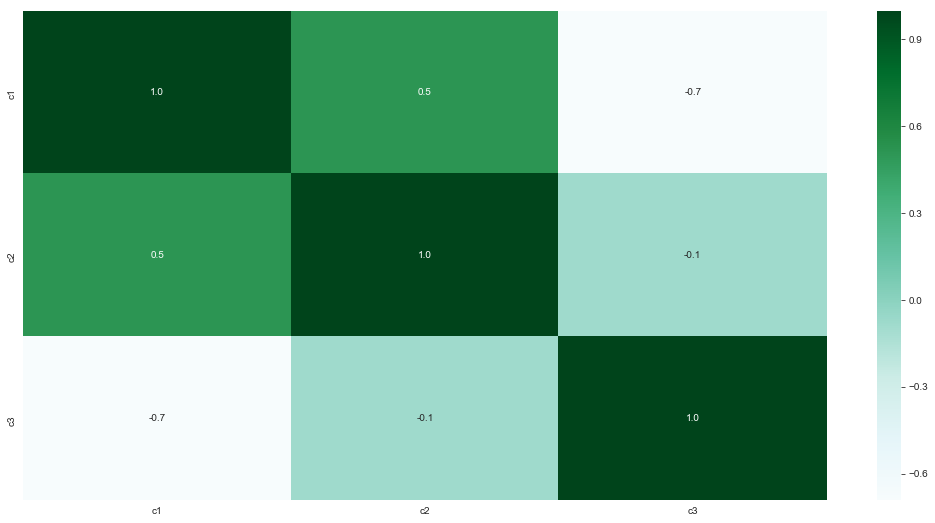

<Figure size 1296x648 with 0 Axes>

In [21]:
v.show_corr_heatmap()

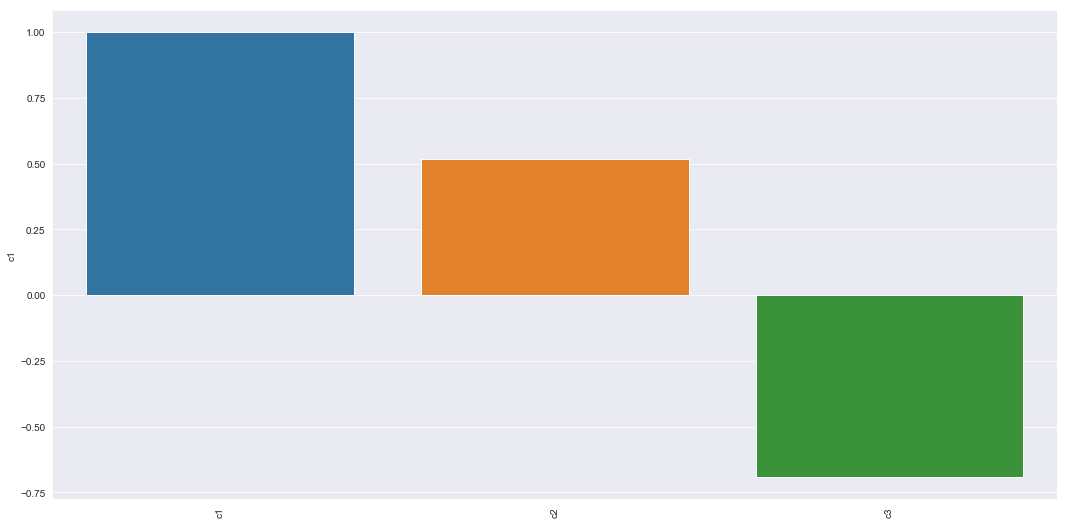

<Figure size 1296x648 with 0 Axes>

In [22]:
v.show_corr('c1')

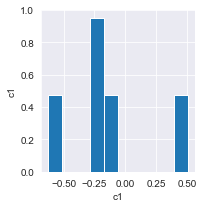

<Figure size 1296x648 with 0 Axes>

In [23]:
v.show_corr_pairs('c1')

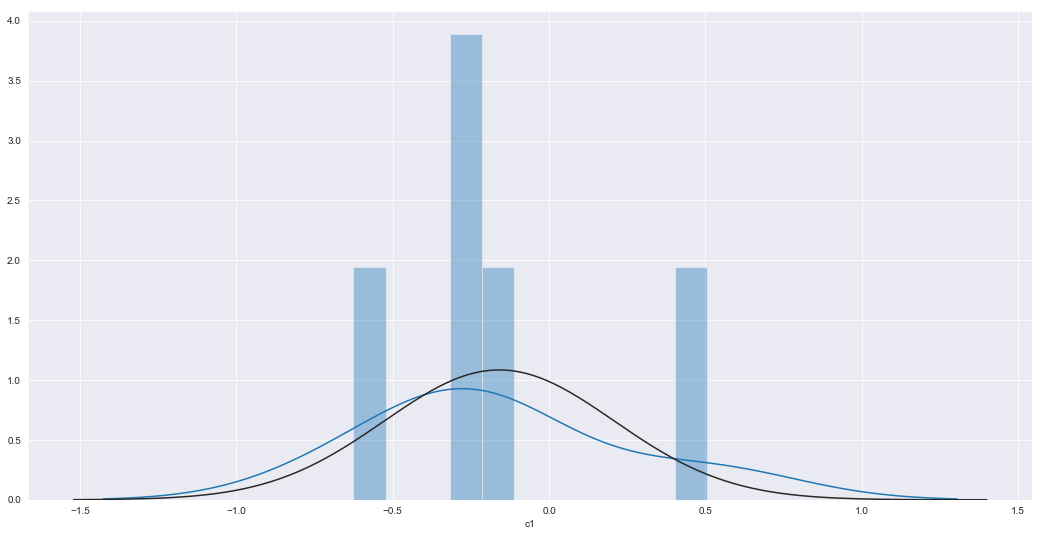

<Figure size 1296x648 with 0 Axes>

In [24]:
v.show_dist('c1')

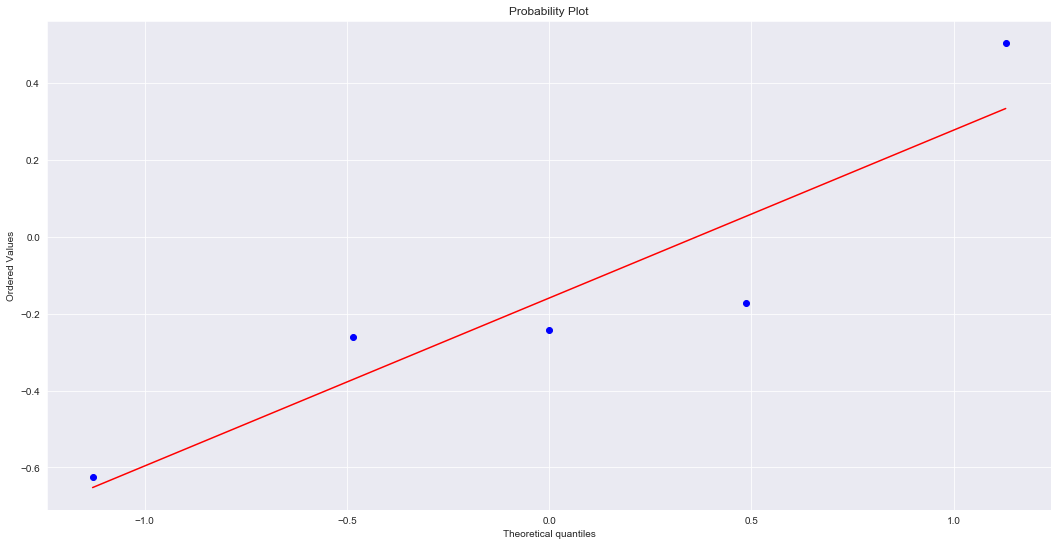

<Figure size 1296x648 with 0 Axes>

In [25]:
v.show_probplot('c1')

In [26]:
#find which library I need to show missing
v.show_missing()

AttributeError: '_Viz' object has no attribute 'show_missing'